## Spandan Nepal

# Task 1: Predicting the percentage of marks of a student based on the number of study hours using LinearRegression (Supervised Learning)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

### importing the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visual Data Analysis

### Scatter plot, between Hours and Scores

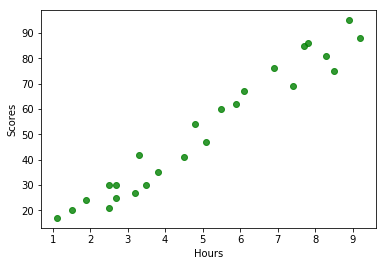

In [39]:
plt.scatter(df['Hours'], df['Scores'], color='green', alpha = 0.8)
plt.xlabel('Hours')
plt.ylabel('Scores')

plt.show()

### Barplot, Scores vs Hours

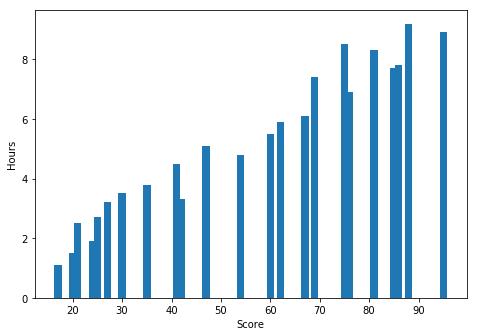

<Figure size 432x288 with 0 Axes>

In [38]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
plt.bar( df['Scores'], df['Hours'], width= 1.5)

plt.xlabel('Score')
plt.ylabel('Hours')

plt.show()
plt.tight_layout()

In [11]:
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Train_Test_Split, and Training 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
lm.intercept_

3.4050301755918966

In [17]:
lm.coef_

array([9.65029083])

## Plotting the regression line

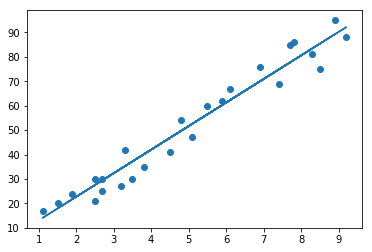

In [18]:
line = lm.coef_*X+lm.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [19]:
print(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]
 [2.7]
 [3.3]
 [5.1]
 [3.8]]


In [20]:
predictions = lm.predict(X_test)

## Predictions

In [21]:
# Comparing Actual vs Predicted
final_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
final_df

,Actual,Predicted
0,81,83.502444
1,30,27.530757
2,21,27.530757
3,76,69.992037
4,62,60.341746
5,25,29.460815
6,42,35.250990
7,47,52.621513
8,35,40.076135


In [22]:
time = [[9.25]]
own_test = lm.predict(time)
print("No of Hours {}".format(time[0]))
print("Score {}".format(own_test))

No of Hours [9.25]
Score [92.67022038]


## Mean absolute error

In [23]:
from sklearn import metrics

In [24]:
metrics.mean_absolute_error(y_test, predictions)

4.564015037730867